# Data Visualisation on Sales Dataset. Find answers for the following questions:

Deal with Null values

● Find the number of unique orders placed so far

● How many unique products we're having as per the
dataset?

● Name the most expensive product on the line

● From which address does the most number of orders are
placed?

● Plot number of orders in each month in line graph

## Import Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Loading Dataset

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,product,quantity,price,date,address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",August
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   order_id  186305 non-null  object
 1   product   186305 non-null  object
 2   quantity  186305 non-null  object
 3   price     186305 non-null  object
 4   date      186305 non-null  object
 5   address   186305 non-null  object
 6   month     186305 non-null  object
dtypes: object(7)
memory usage: 9.9+ MB


## Preprocessing

In [4]:
## Removing unwanted values like --> [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Month_name]
index = []
for k,i in enumerate(df['order_id']):
    try    : int(i)
    except : index.append(k)

df.drop(df.index[index], inplace = True)

In [5]:
# preprocessing order_id, quantity, price

df['order_id'] = df['order_id'].apply(lambda x :   int(x) )
df['quantity'] = df['quantity'].apply(lambda x :   int(x) )
df['price'   ] = df['price'   ].apply(lambda x : float(x) )

In [6]:
# Preprocessing Address and Adding seperate house_no, street, city, state_code, pin_code

state_code = []
pin_code   = []
city       = []
street     = []
house_no   = []
for address in df['address']:  
    
    address =    address.split(','         ) 
    
    sec_1   = address[0].strip().split(maxsplit = 1)
    sec_2   = address[1].strip()
    sec_3   = address[2].strip().split(            )
    
    house_no   += [ int( sec_1[0] )          ]
    pin_code   += [      sec_3[1]            ]
    street     += [      sec_1[1].split()[0] ]
    state_code += [      sec_3[0]            ]
    city       += [      sec_2               ]
     

df['house_no'  ] = house_no
df['street'    ] = street
df['city'      ] = city
df['state_code'] = state_code
df['pin_code'  ] = pin_code

df.head()

,order_id,product,quantity,price,date,address,month,house_no,street,city,state_code,pin_code
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August,359,Spruce,Seattle,WA,98101
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August,492,Ridge,Dallas,TX,75001
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",August,149,7th,Portland,OR,97035
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August,631,2nd,Los Angeles,CA,90001
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August,736,14th,New York City,NY,10001


In [7]:
# Preprocessing date and Adding seperate day, months, year, hours, minutes

dates = { key: [] for key in ['day', 'months', 'year', 'hours', 'minutes'] }

for date in df['date']:
    date = date.split()
    
    sec_1 = date[0].split('/')
    sec_2 = date[1].split(':')
    
    dates['day'     ] += [ int( sec_1[1] ) ]
    dates['months'  ] += [ int( sec_1[0] ) ]
    dates['year'    ] += [ int( sec_1[2] ) ]

    dates['hours'   ] += [ int( sec_2[0] ) ]
    dates['minutes' ] += [ int( sec_2[1] ) ]

for k,v in dates.items():
    df[k] = v 

df.head()

,order_id,product,quantity,price,date,address,month,house_no,street,city,state_code,pin_code,day,months,year,hours,minutes
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August,359,Spruce,Seattle,WA,98101,31,8,19,22,21
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August,492,Ridge,Dallas,TX,75001,15,8,19,15,11
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",August,149,7th,Portland,OR,97035,6,8,19,14,40
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August,631,2nd,Los Angeles,CA,90001,29,8,19,20,59
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August,736,14th,New York City,NY,10001,15,8,19,19,53


In [8]:
# Removing columns date and address and saving preprocessed files

df.drop(['date','address'], axis =1, inplace = True)

df.to_csv('sales_preprocessed.csv', index = False  )

## Questions

### Find the number of unique orders placed so far

###  How many unique products we're having as per the dataset?

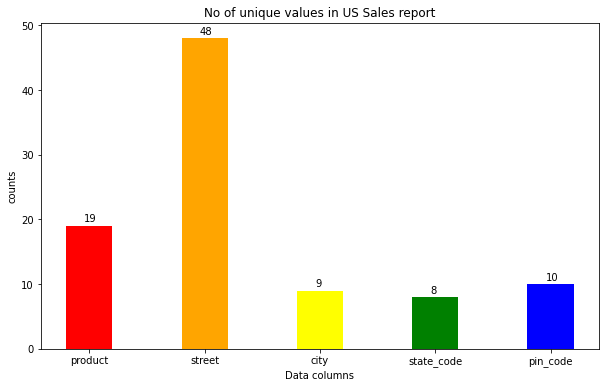

In [9]:
data  = df.nunique()

index = ['product','street','city','state_code','pin_code']
data  = data[index]

x    = data.index
y    = data.values

plt.figure(figsize=(10,6))

color = ['red','orange','yellow','green','blue']

ax = plt.bar(x,y , width = 0.4 ,color = color)

for k, i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y[k])
    
    plt.annotate(
        text      = txt,
        xy        = (x_cord , y_cord),
        xytext    = ( -5, 4),
        textcoords="offset points"
        
                )

plt.xlabel('Data columns')
plt.ylabel('counts')

plt.title('No of unique values in US Sales report')
plt.show()



### Name the most expensive product on the line

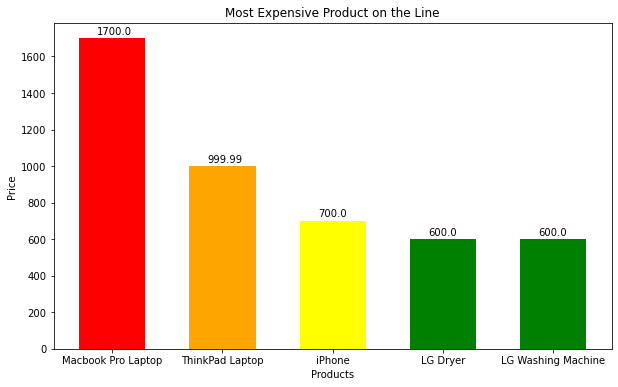

In [10]:
data = df.groupby('product').mean()['price'].sort_values(ascending=False).head()

x    = data.index
y    = data.values

plt.figure(figsize=(10,6))

color = ['red','orange','yellow','green','green']

ax = plt.bar(x,y , width = 0.6 ,color = color)

for k, i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y[k])
    
    plt.annotate(
        text      = txt,
        xy        = (x_cord , y_cord),
        xytext    = ( -15, 4),
        textcoords="offset points"
        
                )

plt.xlabel('Products')
plt.ylabel('Price')

plt.title('Most Expensive Product on the Line')
plt.show()

### Plot number of orders in each month in line graph

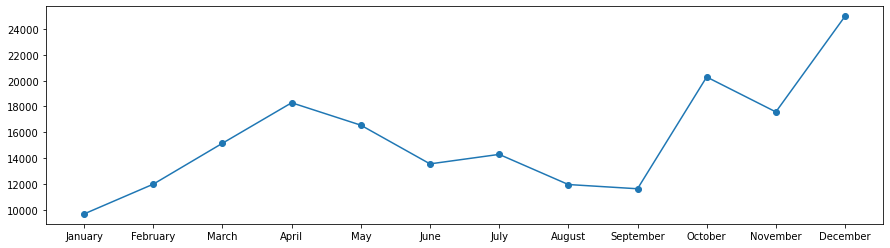

In [11]:
data = df.groupby('month').size()

month_order = df.groupby('month').mean()['months'].sort_values().index

data = data[ month_order ]

x    = data.index
y    = data.values

plt.figure(figsize= (15,4))
ax   = plt.plot(x,y,marker = 'o')

### From which address does the most number of orders are placed?

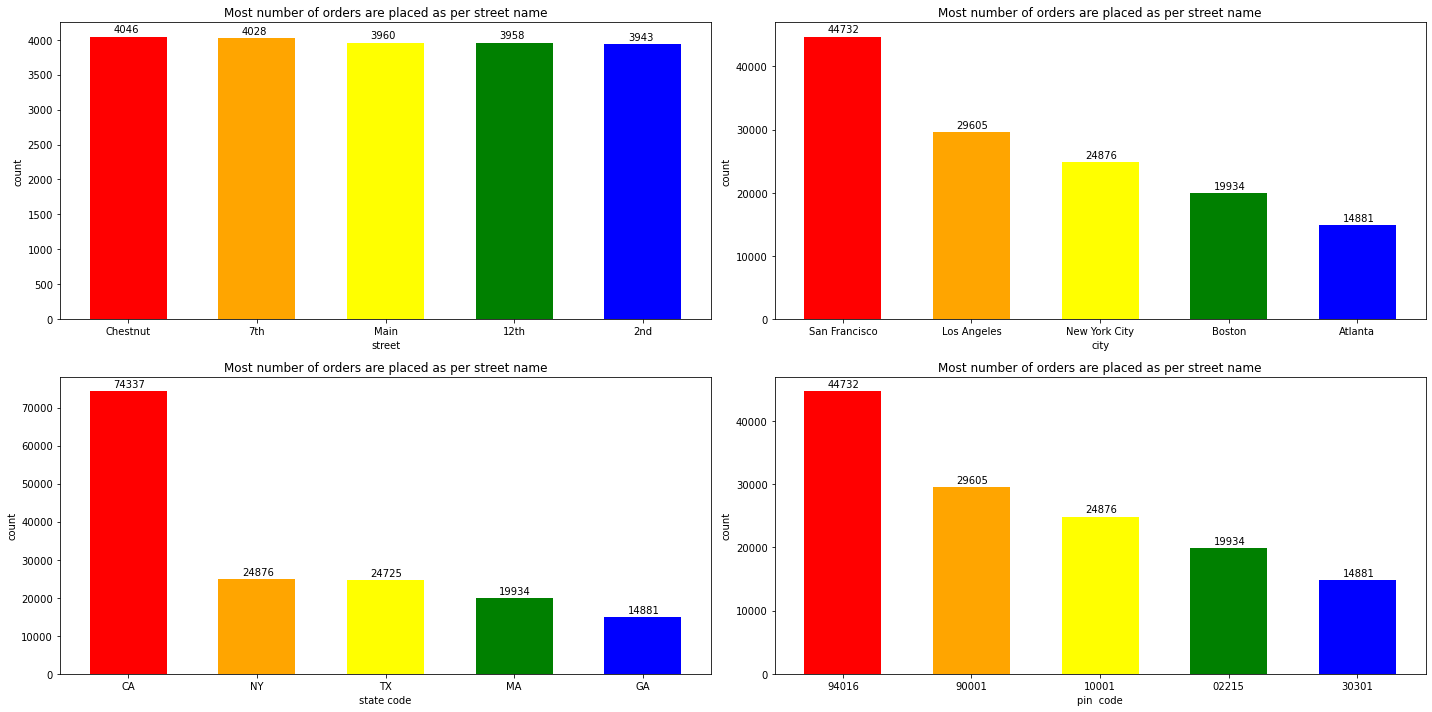

In [22]:
data1 = df.groupby('street'    ).size().sort_values(ascending=False).head()
data2 = df.groupby('city'      ).size().sort_values(ascending=False).head()
data3 = df.groupby('state_code').size().sort_values(ascending=False).head()
data4 = df.groupby('pin_code'  ).size().sort_values(ascending=False).head()

fig , axs = plt.subplots(2,2,figsize=(20,10))
color = ['red','orange','yellow','green','blue']



# Bar graph analysis as per street name
x    = data1.index
y    = data1.values
ax   = axs[0,0].bar(x,y , width = 0.6 ,color = color)

for k, i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y_cord)
    
    axs[0,0].annotate(
        text      = txt,
        xy        = (x_cord , y_cord),
        xytext    = ( -15, 4),
        textcoords="offset points"
                )

axs[0,0].set_xlabel('street')
axs[0,0].set_ylabel('count')
axs[0,0].set_title('Most number of orders are placed as per street name')




# Bar graph analysis as per cities
x    = data2.index
y    = data2.values
ax   = axs[0,1].bar(x,y , width = 0.6 ,color = color)

for k, i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y_cord)
    
    axs[0,1].annotate(
        text      = txt,
        xy        = (x_cord , y_cord),
        xytext    = ( -15, 4),
        textcoords="offset points"
                )

axs[0,1].set_xlabel('city')
axs[0,1].set_ylabel('count')
axs[0,1].set_title('Most number of orders are placed as per cites')





# Bar graph analysis as per state code
x    = data3.index
y    = data3.values
ax   = axs[1,0].bar(x,y , width = 0.6 ,color = color)

for k, i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y_cord)
    
    axs[1,0].annotate(
        text      = txt,
        xy        = (x_cord , y_cord),
        xytext    = ( -15, 4),
        textcoords="offset points"
                )

axs[1,0].set_xlabel('state code')
axs[1,0].set_ylabel('count')
axs[1,0].set_title('Most number of orders are placed as per state code')





# Bar graph analysis as per pin code
x    = data4.index
y    = data4.values
ax   = axs[1,1].bar(x,y, width = 0.6 ,color = color)

for k, i in enumerate(ax):
    
    bar_width = i.get_width() 
    x_cord    = i.xy[0] + bar_width / 2
    y_cord    = i.get_height()
    txt       = str(y_cord)
    
    axs[1,1].annotate(
        text      = txt,
        xy        = (x_cord , y_cord),
        xytext    = ( -15, 4),
        textcoords="offset points"
                )

axs[1,1].set_xlabel('pin  code')
axs[1,1].set_ylabel('count')
axs[1,1].set_title('Most number of orders are placed as per pin code')

fig.tight_layout()

In [13]:
for i in ax:
    print(i)

Rectangle(xy=(-0.4, 0), width=0.8, height=44732, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=29605, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=24876, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=19934, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=14881, angle=0)


In [14]:
dir(axs)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [15]:
data1

street
Chestnut    4046
7th         4028
Main        3960
12th        3958
2nd         3943
dtype: int64